## NAME - PRAKHAR BHARDWAJ

## ANDREW ID - prakharb

<img align="center" src="images/course.png" width="800">

# 16720 (B)  3D Reconstruction - Assignment 5
    Instructor: Kris                         TAs: Arka, Jinkun, Rawal, Rohan, Sheng-Yu

# Instructions

This section should include the visualizations and answers to specifically highlighted questions from P1 to P4. This section will need to be uploaded to gradescope as a pdf and manually graded (this is a separate submission from the coding notebooks).


1. Students are encouraged to work in groups but each student must submit their own work. Include the names of your collaborators in your write up. Code should <span style='color:red'>Not</span>  be shared or copied. Please properly give credits to others by <span style='color:red'>LISTING EVERY COLLABORATOR</span> in the writeup including any code segments that you discussed,  Please <span style='color:red'>DO NOT</span>  use external code unless permitted. Plagiarism is prohibited and may lead to failure of this course.

2.  **Start early!** This homework will take a long time to complete.
    
3. **Questions:** If you have any question, please look at Piazza first and the FAQ page for this homework.

4. All the theory question and manually graded questions should be included in a single writeup (this notebook exported as pdf or a standalone pdf file) and submitted to gradescope: pdf assignment. 

5. **Attempt to verify your implementation as you proceed:** If you don’t verify that your implementation is correct on toy examples, you will risk having a huge issue when you put everything together. We provide some simple checks in the notebook cells, but make sure you verify them on more complicated samples before moving forward. 

6. **Do not import external functions/packages other than the ones already imported in the files:** The current imported functions and packages are enough for you to complete this assignment. If you need to import other functions, please remember to comment them out after submission. Our autograder will crash if you import a new function that the gradescope server does not expect. 

7. Assignments that do not follow this submission rule will be **penalized up to 10\% of the total score**.


# Theory Questions (25 pts)

Before implementing our own 3D reconstruction, let's take a  look at some simple theory questions that may arise. The answers to the below questions should be relatively short, consisting of a few lines of math and text (maybe a diagram if it helps your understanding).  

<img align="center" src="images/drawing-1.png" width="800">
<center> <figcaption align="center"><b>Figure1. Figure for Q1.1. $C1$ and $C2$ are the optical centers. The principal axes intersect at point $\textbf{w}$ ($P$ in the figure).</b></figcaption> </center>




## Q0.1
Suppose two cameras fixated on a point $x$ (see Figure 1) in space such that their principal axes intersect at the  point $P$. Show that if the image coordinates are normalized so that the coordinate origin $(0, 0)$
coincides with the principal point, the $\textbf{F}_{33}$ element of the fundamental matrix is zero.

Lets say $\mathbf{x}_1 = \begin{bmatrix}x_1 & y_1 & 1 \end{bmatrix}^T$ are the pixel coordinates on the left camera image plane and $\mathbf{x}_2 = \begin{bmatrix}x_2 & y_2 & 1 \end{bmatrix}^T$ are for the right camera image plane.

Using the epipolar constraint as,

$\mathbf{x}_1^T F \mathbf{x}_2 = 0$

we know that $F$ is the fundamental matrix.

A point which is on the right image plane is represented by a line (epipolar line) on the left image plane.

Solving for the corresponding line equation

$\mathbf{x}_1^T F \mathbf{x}_2 = 0$
$\begin{bmatrix}x_1 & y_1 & 1 \end{bmatrix} \begin{bmatrix}f_{11} & f_{12} & f_{13} \\ f_{21} & f_{22} & f_{23} \\ f_{31} & f_{32} & f_{33} \end{bmatrix} \begin{bmatrix}x_2 \\ y_2 \\ 1 \end{bmatrix} = 0$

$\begin{bmatrix}x_1 & y_1 & 1 \end{bmatrix} \begin{bmatrix}f_{11} x_2 + f_{12} y_2 + f_{13} \\ f_{21} x_2 + f_{22} y_2 + f_{23} \\ f_{31} x_2 + f_{32} y_2 + f_{33} \end{bmatrix} = 0$

$\left(f_{11} x_2 + f_{12} y_2 + f_{13}\right) x_1 + \left(f_{21} x_2 + f_{22} y_2 + f_{23}\right) y_1 + \left(f_{31} x_2 + f_{32} y_2 + f_{33}\right) = 0$ 

This line equation represents the left image plane epipolar line for a point $\mathbf{x}_2$ on the right image plane.

The lines passing through the principal points intersect with each other. Hence, these are correspondences. These correspondences are both origins in their respective image planes.

Considering the left image plane epipolar line for the origin $\begin{bmatrix}0 & 0 & 1 \end{bmatrix}^T$

$f_{13} x_1 + f_{23} y_1 + f_{33} = 0$

We know that the left image plane correspondence of (0, 0) is (0, 0), the above line should pass through origin. Hence, the constant term needs to be 0.

$\therefore f_{33} = 0$

## Q0.2
Consider the case of two cameras viewing an object such that the second camera differs from the first by a pure translation that is parallel to the $x$-axis. Show that the epipolar lines in the two cameras are also parallel to the $x$-axis. Backup your argument with relevant equations.


Given -  No rotation and translation is only along x-axis

$ \mathbf{R} = \mathbf{I}, \mathbf{t} = \begin{bmatrix}t \\ 0 \\ 0 \end{bmatrix}$

Essential matrix can be calculated as 

$ \mathbf{E} = \mathbf{T}_x\mathbf{R} = \begin{bmatrix}0 & 0 & 0 \\ 0 & 0 & -t \\ 0 & t & 0 \end{bmatrix}\mathbf{I} = \begin{bmatrix}0 & 0 & 0 \\ 0 & 0 & -t \\ 0 & t & 0 \end{bmatrix}$

Let $\mathbf{x}_1 = \begin{bmatrix}x_1 & y_1 & 1 \end{bmatrix}^T$ be the pixel coordinates on the left camera image plane.

Epipolar line is given by the relation below - 

$\mathbf{L} = \mathbf{Ex}_1$
$ \mathbf{L} = \begin{bmatrix}0 & 0 & 0 \\ 0 & 0 & -t \\ 0 & t & 0 \end{bmatrix}\begin{bmatrix}x_1 \\ y_1 \\ 1 \end{bmatrix}$
$ \mathbf{L} = \begin{bmatrix}0 \\ -t \\ ty_1 \end{bmatrix}$

Line is of the form $y = constant$ as the $x$ component is 0.

X-axis is parallel to this line. 

Similarly, we can show that the epipolar line on right image plane is parallel to x-axis in a similar case

## Q0.3
Suppose we have an inertial sensor which gives us the accurate extrinsics $\mathbf{R}_i$ and $\textbf{t}_i$ (see Figure 2), the rotation matrix and translation vector of the robot at time $i$. What will be the effective rotation ($\textbf{R}_{rel}$) and translation ($\textbf{t}_{rel}$) between two frames at different time stamps? Suppose the camera intrinsics ($\textbf{K}$) are known, express the essential matrix ($\textbf{E}$) and the fundamental matrix ($\textbf{F}$) in terms of $\textbf{K}$, $\textbf{R}_{rel}$ and $\textbf{t}_{rel}$.

<img align="center" src="images/F_E.png" width="500">
<center> <figcaption align="center"><b>Figure 2. Figure for Q1.3. $C1$ and $C2$ are the optical centers. The rotation and the translation is obtained using inertial sensors. $\textbf{R}_{rel}$ and $\textbf{t}_{rel}$ are the relative rotation and translation between two frames.</b></figcaption> </center>

Lets say a point in the 3-D world $\mathbf{x} = \begin{bmatrix} x & y & z\end{bmatrix}^T$

At time = 1 the corresponding camera 3-D point is $\mathbf{u}_1$


$\mathbf{u}_1 = \begin{bmatrix}\mathbf{R_1} & \big | & \mathbf{t_1}\end{bmatrix}\mathbf{x}$
$\mathbf{u}_1 = \mathbf{R_1}\mathbf{x} + \mathbf{t_1}$
$\mathbf{x} = \mathbf{R_1}^{-1}\left(\mathbf{u}_1 - \mathbf{t_1}\right)$


At time = 2 the corresponding camera 3-D point is $\mathbf{u}_2$


$\mathbf{u}_2 = \begin{bmatrix}\mathbf{R_2} & \big | & \mathbf{t_2}\end{bmatrix}\mathbf{x}$
$\mathbf{u}_2 = \mathbf{R_2}\mathbf{x} + \mathbf{t_2}$

Substituting the value of $\mathbf{x}$

$\mathbf{u}_2 = \mathbf{R_2}\left[\mathbf{R_1}^{-1}\left(\mathbf{u}_1 - \mathbf{t_1}\right) \right] + \mathbf{t_2}$
$\mathbf{u}_2 = \mathbf{R_2}\mathbf{R_1}^{-1}\mathbf{u}_1 + \mathbf{t_2} - \mathbf{R_2}\mathbf{R_1}^{-1}\mathbf{t_1}$
$\mathbf{u}_2 = \mathbf{R_{rel}}\mathbf{u}_1 + \mathbf{t_{rel}}$

The relative rotation and translation to get it from the initial point to the final point is given by

$\therefore \mathbf{R}_{rel} = \mathbf{R_2}\mathbf{R_1}^{-1}, \mathbf{t}_{rel} = \mathbf{t_2} - \mathbf{R_2}\mathbf{R_1}^{-1}\mathbf{t_1}$

Essential matrix -  $ \mathbf{E} = \mathbf{t}_{rel} \times \mathbf{R}_{rel}$

Fundamental matrix -  $ \mathbf{F} = (\mathbf{K}^{-1})^T\mathbf{E}\mathbf{K}^{-1} $
$ \mathbf{F} = (\mathbf{K}^{-1})^T\left(\mathbf{t}_{rel} \times \mathbf{R}_{rel}\right)\mathbf{K}^{-1}$

## Q0.4

Suppose that a camera views an object and its reflection in a plane mirror. Show that this situation is equivalent to having two images of the object which are related by a skew-symmetric fundamental matrix. You may assume that the object is flat, meaning that all points on the object are of equal distance to the mirror (**Hint:** draw the relevant vectors to understand the relationship between the camera, the object, and its reflected image.)





All of the object's points are equally far from the reflected picture since it is flat. The object must therefore be moved a certain distance in order to capture the reflected image. The object is flat and parallel to the mirror, thus there is no spinning involved.

Additionally, in this instance, the translated object is similar to the fixed object with two viewpoints for the same camera that are separated by the same translation.

$\therefore \mathbf{R} = \mathbf{I}, \mathbf{t} = \begin{bmatrix}t_x \\ t_y \\ t_z\end{bmatrix}$

Corresponding translation skew symmetric matrix is, $ \mathbf{T}_x = \begin{bmatrix}0 & -t_z & t_y \\ t_z & 0 & -t_x \\ -t_y & t_x & 0\end{bmatrix}$

The Essential matrix is - $\mathbf{E} = \mathbf{T}_x\mathbf{R} = \mathbf{T}_x\mathbf{I} =\mathbf{T}_x$

We calculate the fundamental matrix as - 

$ \mathbf{F} = (K^T)^{-1} \mathbf{E} K^{-1}$ 
$ \mathbf{F} = (K^T)^{-1} \mathbf{T}_x K^{-1}$

Calculating $\mathbf{F}^T$

$ \mathbf{F}^T = \left[(K^T)^{-1} \mathbf{T}_x K^{-1}\right]^T $
$ \mathbf{F}^T = (K^{-1})^T \mathbf{T}_x^T ((K^T)^{-1})^T$
$ \mathbf{F}^T = (K^{-1})^T \mathbf{T}_x^T ((K^T)^T)^{-1}$
$ \mathbf{F}^T = (K^{-1})^T \mathbf{T}_x^T K^{-1}$

Since $\mathbf{T}_x$ is a skew symmetric matrix, $\mathbf{T}_x^T = - \mathbf{T}_x$

$\therefore \mathbf{F}^T = - (K^{-1})^T \mathbf{T}_x K^{-1} = - \mathbf{F}$

As $\mathbf{F}^T = - \mathbf{F}$,  fundamental matrix is skew symmetric

# Coding Questions (30 pt)

### Q1.1: The Eight Point Algorithm

<span style='color:red'>**Output:**</span> In your write-up: Write your recovered $\textbf{F}$ and include an image of some example outputs of displayEpipolarF.



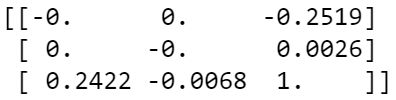

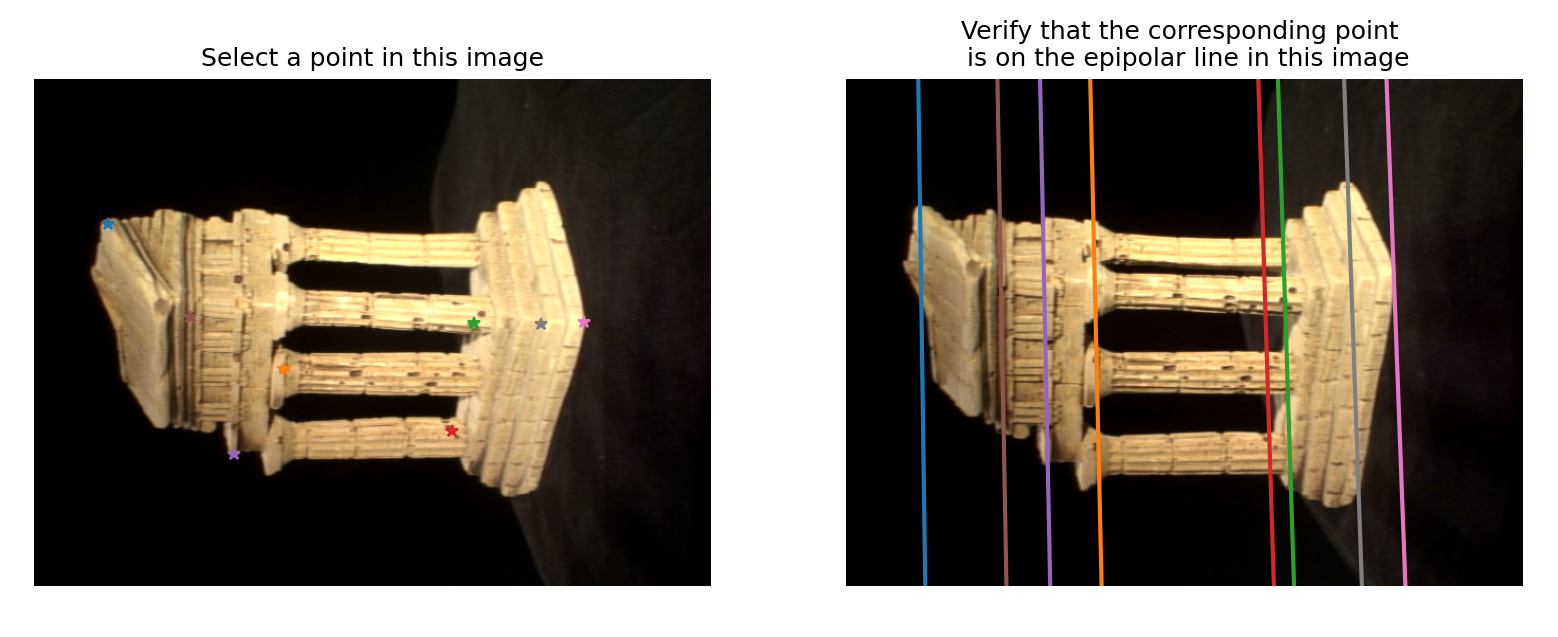

### Q1.2: The Seven Point Algorithm
<span style='color:red'>**Output:**</span> In your write-up: Print your recovered $\textbf{F}$ and include an image output of `displayEpipolarF`.


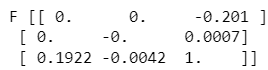

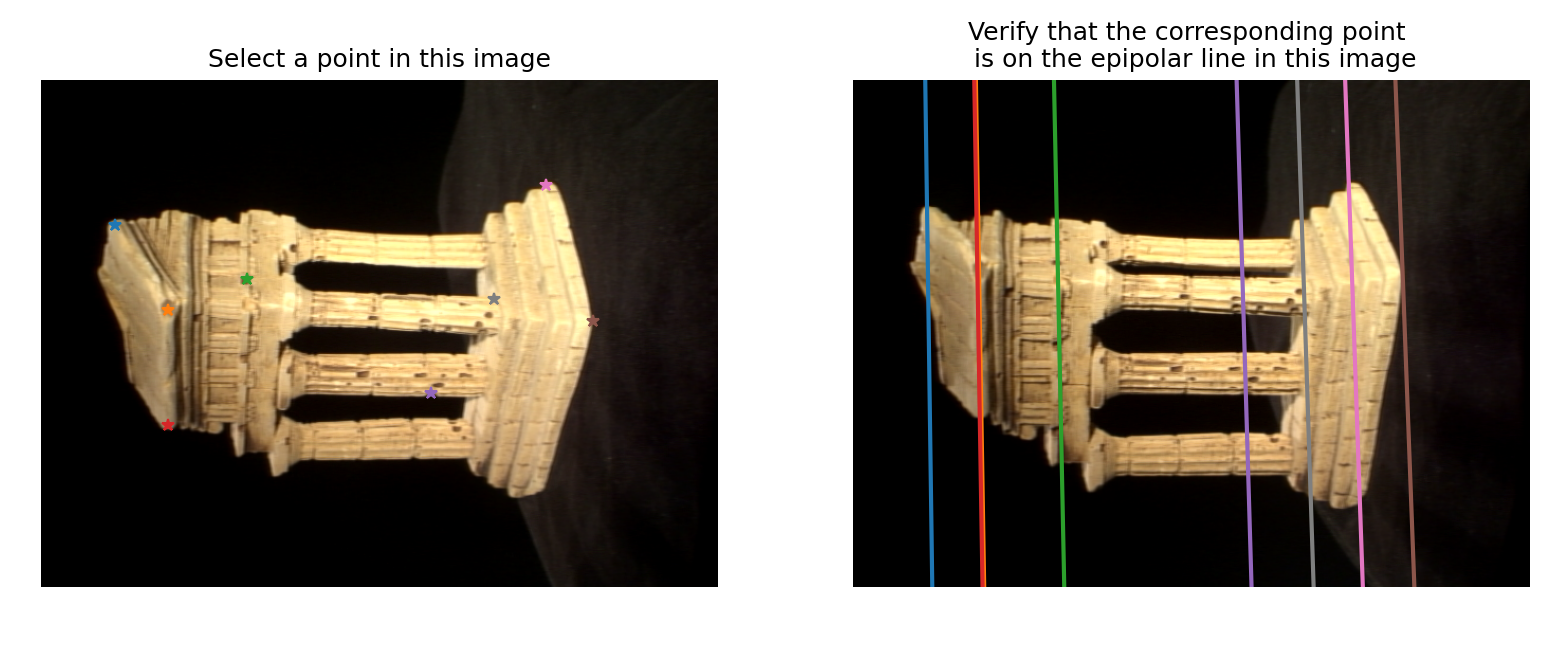

### Q2.2 Triangulation and find M2 

<span style='color:red'>**Output:**</span> In your write-up: Write down the expression for the matrix $\mathbf{A}_i$


Let the image pixel of left camera  be $\begin{bmatrix}u_2^i & v_2^i\end{bmatrix}$ and the corresponding right camera image pixel be $\begin{bmatrix}u_1^i & v_1^i\end{bmatrix}$ for ith correspondence. Say $C2$ is the projection matrix for the left camera and $C1$ is the projection matrix for the right camera.

Then,
    $\mathbf{A}_i = 
    \begin{bmatrix}
    u_1^iC1_{31} - C1_{11} & u_1^iC1_{32} - C1_{12} & u_1^iC1_{33} - C1_{13} & u_1^iC1_{34} - C1_{14}\\
    v_1^iC1_{31} - C1_{21} & v_1^iC1_{32} - C1_{22} & v_1^iC1_{33} - C1_{23} & v_1^iC1_{34} - C1_{24}\\
    u_2^iC2_{31} - C2_{11} & u_2^iC2_{32} - C2_{12} & u_2^iC2_{33} - C2_{13} & u_2^iC2_{34} - C2_{14}\\
    v_2^iC2_{31} - C2_{21} & v_2^iC2_{32} - C2_{22} & v_2^iC2_{33} - C2_{23} & v_2^iC2_{34} - C2_{24}
    \end{bmatrix}$

### Q2.3 Epipolar Correspondence

<span style='color:red'>**Output:**</span> In your write-up, include a screenshot of `epipolarMatchGUI`
with some detected correspondences.



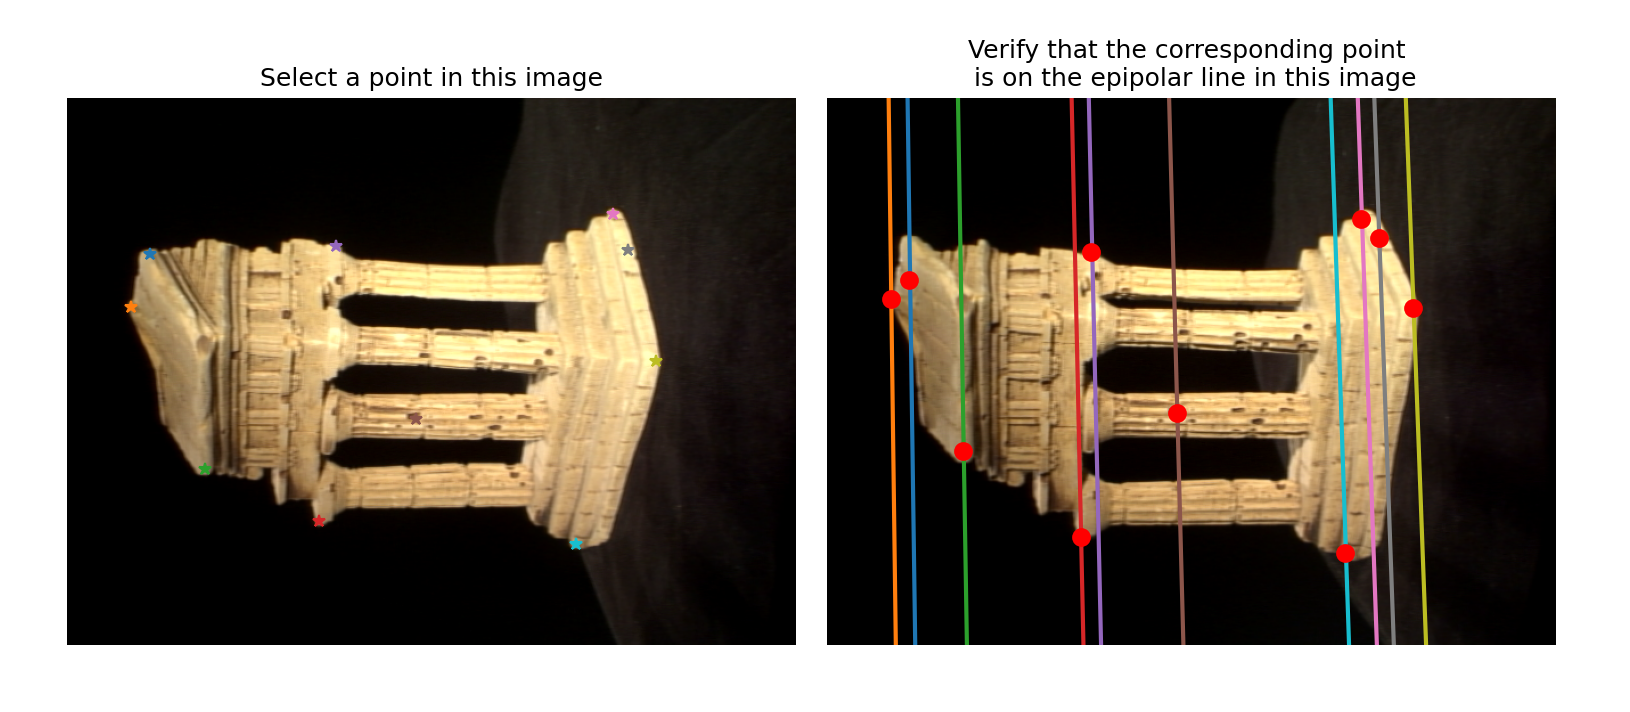

### Q2.4 3D Visualization

<span style='color:red'>**Output:**</span> In your write-up: Take a few screenshots of the 3D visualization
so that the outline of the temple is clearly visible.


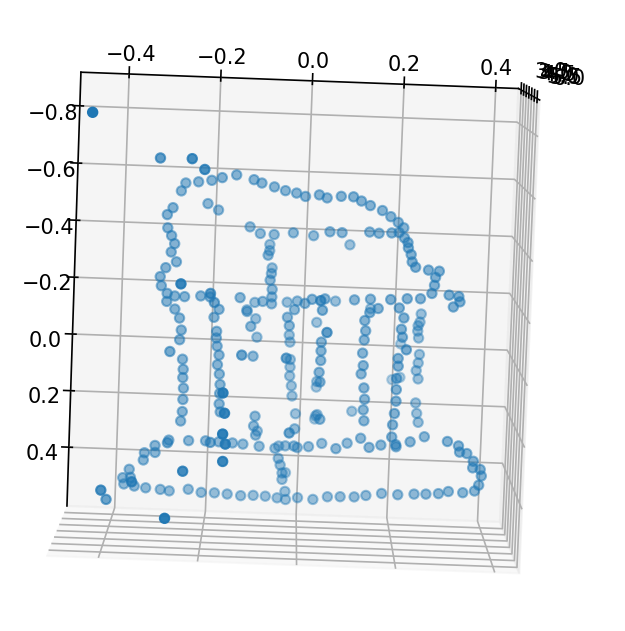

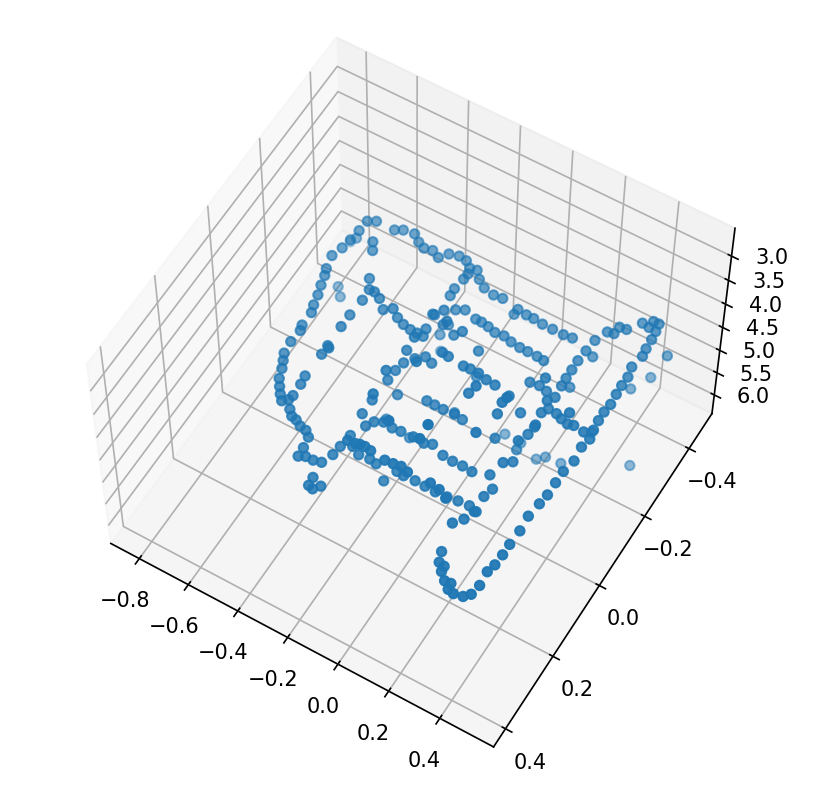

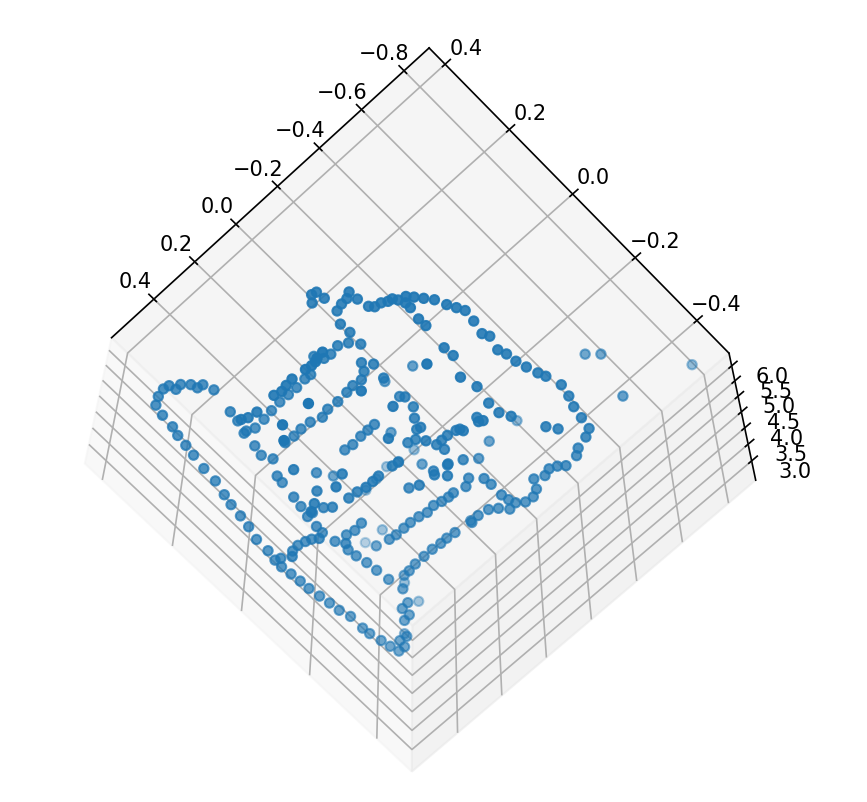

### Q3.3 Bundle Adjustment

<span style='color:red'>**Output:**</span> In your write-up: include an image of output of the `plot_3D_dual` function by passing in the original 3D points and the optimized points. Also include the before and after reprojection error for the `rodriguesResidual` function.
